In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from snudda.utils.load import SnuddaLoad
import matplotlib.pyplot as plt

In [2]:

external = os.path.join("/media", "jofrony", "2TB", "dardel", "current_bgd2", "population_unit", "complete_network",
                        "supercomputer", "networks")

e = Experiments()
e.add_experiment(name="p05_p1",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5")

sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)


Loading 40000 neurons with 35040256 synapses and 2531 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/population_unit/complete_network/supercomputer/networks/pdc_network_2022-08-31-p05/simulation/network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5


In [ ]:
%%time
neuron_type = "dSPN"
specific_trace_ids = sl.get_population_units(neuron_type=neuron_type, population_unit=1)

depolarisation_blocked = depolarisation_block(data_obj=sl, specific_trace_ids=specific_trace_ids)


In [ ]:
t
for e in depolarisation_blocked:
    d = sl.get_data(name=e)
    for i, r in depolarisation_blocked[e].items():
        
        if r:
            plt.figure()
            v = d.get_voltage(neuron_id=i)
            plt.plot(v)
            

In [3]:
%%time
neuron_type = "dSPN"
connectivity, p1, p2 = connectivity_analysis(data_obj=sl, pre=["dSPN", "iSPN", "FS", "LTS", "ChIN"], post=neuron_type, max_post=70)

CPU times: user 24.4 s, sys: 2 s, total: 26.4 s
Wall time: 26.4 s


In [ ]:
p1

In [ ]:
p2["p05_p1"]

In [ ]:
specific_trace_ids_p1 = sl.get_population_units(neuron_type=neuron_type, population_unit=1)
specific_trace_ids_p1

In [ ]:
specific_trace_ids_p2 = sl.get_population_units(neuron_type="dSPN", population_unit=2)
specific_trace_ids_p2

In [ ]:
specific_trace_ids_p2 = sl.get_population_units(neuron_type="iSPN", population_unit=2)
specific_trace_ids_p2

In [4]:
customize = {plt.ylim:(0,1000)}

In [5]:
folder="connectivity"

In [6]:
colors = ["grey","green" ,"blue"]

In [7]:
connectivity

{'p05_p1': {4: {0: 10,
   20: 2,
   35: 3,
   79: 3,
   85: 3,
   96: 3,
   137: 3,
   149: 3,
   238: 3,
   245: 3,
   266: 3,
   323: 4,
   355: 5,
   384: 2,
   386: 1,
   518: 3,
   629: 9,
   664: 3,
   697: 3,
   888: 4,
   1406: 3,
   2760: 2},
  605: {13: 3,
   35: 3,
   45: 3,
   56: 5,
   61: 2,
   62: 2,
   74: 3,
   79: 4,
   93: 6,
   105: 3,
   108: 4,
   123: 2,
   134: 3,
   141: 3,
   143: 3,
   144: 3,
   164: 3,
   176: 3,
   186: 3,
   191: 4,
   217: 6,
   219: 5,
   225: 2,
   238: 4,
   240: 3,
   244: 3,
   252: 3,
   261: 4,
   276: 4,
   302: 2,
   312: 3,
   380: 3,
   382: 2,
   384: 2,
   423: 3,
   425: 4,
   436: 1,
   444: 3,
   456: 4,
   464: 3,
   469: 4,
   480: 4,
   493: 2,
   518: 3,
   559: 3,
   569: 3,
   577: 3,
   583: 3,
   586: 3,
   593: 5,
   594: 4,
   606: 3,
   615: 3,
   626: 3,
   635: 4,
   669: 4,
   696: 3,
   767: 3,
   806: 3,
   854: 2,
   863: 3,
   888: 3,
   893: 2,
   938: 4,
   943: 4,
   981: 3,
   994: 1,
   998: 3,
   1

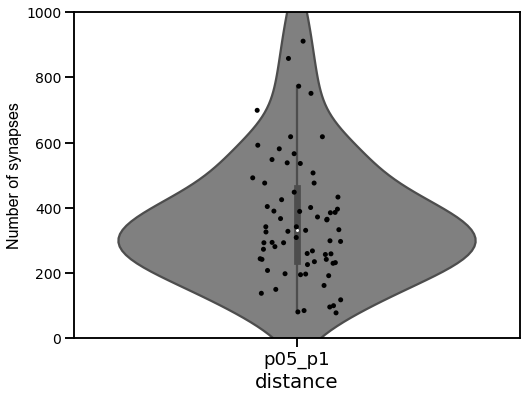

In [8]:
plot_synapses_violin(connectivity, experiment_names=e, colors=colors, name=neuron_type, folder=folder, save=True, customize=customize)

In [ ]:
d = {"synapses": list()}
for c in connectivity:

    for k, v in connectivity[c].items():
        d ["synapses"].append(len(v))

In [ ]:
import matplotlib.pyplot as plt
plt.hist(d["synapses"])

In [ ]:
d = {"synapses": list()}
for c in connectivity:

    for k, v in connectivity[c].items():
        sums = 0
        for i, r in v.items():
            sums+=r
        d["synapses"].append(sums)

In [ ]:
import matplotlib.pyplot as plt
plt.hist(d["synapses"])

In [ ]:

external = os.path.join("/media", "jofrony", "2TB", "dardel", "current_bgd2", "population_unit", "complete_network",
                        "supercomputer", "networks")

e = Experiments()
e.add_experiment(name="p05_p1",
                 color="green",
                 label="p=0.5",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-31-p05"),
                 output="network_output_network-synapses_cell_ids_current_injection_dardel_2022-09-21-13-46-27_p1.hdf5")

sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=True)


In [13]:
synapses = sl.experiments["p05_p1"]["network_structure"].data["synapses"]


In [ ]:
%%time
tmp = list()
import numpy as np
for s in specific_trace_ids_p1["p05_p1"][:7000]:
    presynaptic = np.where(synapses.T[1] == s)
    tmp.append(len(presynaptic[0]))

In [ ]:
plt.hist(tmp)

In [19]:
%%time
tmp = list()
tmp2 = list()
import numpy as np
tots = dict()
for s in specific_trace_ids_p1["p05_p1"][::100]:
    presynaptic = np.where(synapses.T[1] == s)
    presynaptic = np.take(synapses.T[0], presynaptic[0])
    sums = 0
    tmps = dict()
    tmp2.append(len(presynaptic))
    for i in presynaptic:
        if i in specific_trace_ids_p2["p05_p1"]:
            sums+=1
        if i not in tmps:
            tmps.update({i: 1})
        else:
            tmps[i]=tmps[i]+1
    if sums>0:
        tmp.append(sums)
    tots.update({s:tmps})

CPU times: user 27.8 s, sys: 2.33 s, total: 30.1 s
Wall time: 30.1 s


In [22]:
tots

{4: {0: 10,
  1: 2,
  20: 2,
  35: 3,
  70: 2,
  79: 3,
  81: 3,
  85: 3,
  96: 3,
  98: 4,
  119: 2,
  128: 4,
  137: 3,
  149: 3,
  153: 2,
  205: 2,
  226: 3,
  238: 3,
  245: 3,
  259: 2,
  266: 3,
  270: 3,
  274: 4,
  280: 5,
  323: 4,
  355: 5,
  384: 2,
  386: 1,
  518: 3,
  598: 1,
  604: 3,
  609: 3,
  629: 9,
  630: 8,
  641: 2,
  655: 4,
  659: 4,
  664: 3,
  678: 2,
  697: 3,
  888: 4,
  1260: 3,
  1314: 3,
  1400: 2,
  1406: 3,
  1443: 3,
  1544: 3,
  2760: 2},
 510: {32: 3,
  33: 2,
  74: 4,
  79: 4,
  82: 2,
  110: 4,
  137: 3,
  156: 4,
  166: 3,
  190: 1,
  282: 3,
  298: 4,
  302: 3,
  309: 4,
  311: 2,
  313: 4,
  320: 3,
  322: 3,
  328: 3,
  329: 4,
  331: 3,
  334: 3,
  339: 2,
  341: 3,
  344: 3,
  353: 5,
  356: 5,
  361: 3,
  363: 2,
  365: 4,
  367: 4,
  369: 4,
  372: 5,
  374: 2,
  375: 4,
  381: 5,
  384: 3,
  385: 4,
  390: 4,
  392: 4,
  399: 3,
  405: 4,
  411: 3,
  424: 3,
  429: 3,
  433: 3,
  442: 4,
  447: 4,
  449: 3,
  454: 4,
  461: 3,
  468: 2,


In [54]:
p2_dspn = sl.get_population_units(neuron_type="dSPN", population_unit=2)
p2_ispn = sl.get_population_units(neuron_type="iSPN", population_unit=2)
p2_fs = sl.get_population_units(neuron_type="FS", population_unit=2)
p2_lts = sl.get_population_units(neuron_type="LTS", population_unit=2)
p2_chin = sl.get_population_units(neuron_type="ChIN", population_unit=2)

In [56]:
%%time
tmp = list()
tmp2 = list()
import numpy as np
tots = dict()
for s in list(connectivity['p05_p1'].keys()):
    presynaptic = np.where(synapses.T[1] == s)
    presynaptic = np.take(synapses.T[0], presynaptic[0])

    sums = 0
    tmps = dict()
    tmp2.append(len(presynaptic))
    for i in presynaptic:
        if i in p2_dspn["p05_p1"] or i in p2_ispn["p05_p1"] or i in p2_fs["p05_p1"] or i in p2_lts["p05_p1"] or i in p2_chin["p05_p1"]:
            sums+=1
            if i not in tmps:
                tmps.update({i: 1})
            else:
                tmps[i]=tmps[i]+1
    if sums>0:
        tmp.append(sums)
    tots.update({s:tmps})

CPU times: user 25.7 s, sys: 2.01 s, total: 27.7 s
Wall time: 27.7 s


In [ ]:
t1 = {1:1, 2:2, 3:3, 4:{"a":"hello", "b":[1, 2, 3]}}
t2 = {1:1, 2:2, 3:3, 4:{"a":"hello", "b":[1, 3, 2, 3]}}


In [26]:
from deepdiff import DeepDiff

In [57]:
for s,r in tots.items():
    for i, k in r.items():
        if connectivity['p05_p1'][s][i] == k:
            pass
        else:
            print("problem")
        

    

In [60]:
for s,r in connectivity['p05_p1'].items():

    for i, k in r.items():
    
        if tots[s][i] == k:
            pass
        else:
            print("problem")

    

In [61]:
ddiff = DeepDiff(connectivity['p05_p1'], tots, ignore_order=True)
print (ddiff)

{}


In [65]:
tt = list()
for k in tots:
    s= 0
    for i, r in tots[k].items():
        s+=r
    tt.append(s)

(array([ 9., 15., 15., 14.,  6.,  6.,  1.,  2.,  2.,  1.]),
 array([  78. ,  171.3,  264.6,  357.9,  451.2,  544.5,  637.8,  731.1,
         824.4,  917.7, 1011. ]),
 <BarContainer object of 10 artists>)

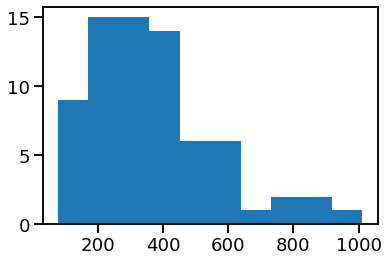

In [66]:
plt.hist(tt)

(array([ 9., 15., 15., 14.,  6.,  6.,  1.,  2.,  2.,  1.]),
 array([  78. ,  171.3,  264.6,  357.9,  451.2,  544.5,  637.8,  731.1,
         824.4,  917.7, 1011. ]),
 <BarContainer object of 10 artists>)

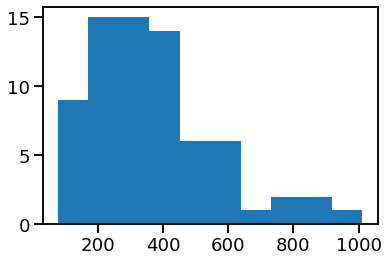

In [62]:
plt.hist(tmp)


(array([ 7., 13., 16., 16.,  6.,  6.,  2.,  1.,  2.,  2.]),
 array([ 154. ,  380.1,  606.2,  832.3, 1058.4, 1284.5, 1510.6, 1736.7,
        1962.8, 2188.9, 2415. ]),
 <BarContainer object of 10 artists>)

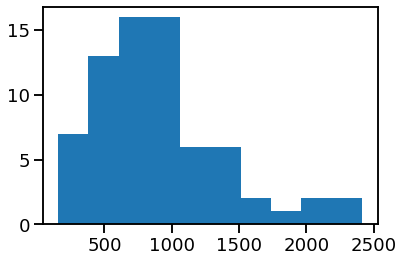

In [63]:
plt.hist(tmp2)

In [10]:
specific_trace_ids_p1 = sl.get_population_units(neuron_type=neuron_type, population_unit=1)

In [51]:
specific_trace_ids_p2 = sl.get_population_units(neuron_type="FS", population_unit=2)

In [52]:
specific_trace_ids_p2

{'p05_p1': array([    0,    93,   281,   487,   629,  1005,  1064,  1144,  1145,
         1208,  1545,  1843,  2023,  2503,  2520,  2760,  3083,  3149,
         3537,  3676,  3758,  3880,  3881,  3974,  4141,  4864,  5039,
         5538,  5539,  5716,  5821,  5822,  5944,  6299,  6413,  6414,
         6548,  6696,  6698,  6841,  6904,  7160,  7244,  7282,  7379,
         7678,  7742,  7743,  7874,  8931,  8992,  9311,  9407,  9617,
         9679,  9680,  9833,  9834, 10029, 10241, 10515, 10516, 11199,
        11251, 11252, 11316, 11342, 11552, 11840, 12327, 13070, 13151,
        13229, 13317, 13543, 13610, 14117, 14182, 14315, 14432, 15119,
        15540, 15649, 15764, 15838, 15903, 16133, 16204, 16377, 16663,
        16890, 16948, 16949, 17007, 17238, 17239, 17291, 17322, 17380,
        17442, 17705, 17840, 17841, 18080, 18135, 18266, 18761, 18891,
        18954, 19079, 19145, 19685, 20223, 20413, 20414, 21229, 21899,
        22227, 22362, 22601, 22736, 23682, 23813, 23990, 24121, 244